In [233]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
from sklearn import metrics
%matplotlib inline 

In [234]:
def correlation(x, y):
    std_x = (x - x.mean())/x.std(ddof=0)
    std_y = (y - y.mean())/y.std(ddof=0)
    correl = (std_x*std_y).mean()
    return correl

In [235]:
data = pd.read_csv('Hospital_Value-Based_Purchasing.csv')
data.head(2)

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,Communication with Nurses Floor,Communication with Nurses Achievement Threshold,Communication with Nurses Benchmark,...,Overall Rating of Hospital Achievement Threshold,Overall Rating of Hospital Benchmark,Overall Rating of Hospital Baseline Rate,Overall Rating of Hospital Performance Rate,Overall Rating of Hospital Achievement Points,Overall Rating of Hospital Improvement Points,Overall Rating of Hospital Dimension Score,HCAHPS Base Score,HCAHPS Consistency Score,Location
0,100209,KENDALL REGIONAL MEDICAL CENTER,11750 BIRD RD,Miami,FL,33175,DADE,58.14,78.19,86.61,...,70.02,84.6,61.01,60.28,0 out of 10,0 out of 9,0 out of 10,1,14,"11750 BIRD RD\nMiami, FL 33175\n"
1,50309,SUTTER ROSEVILLE MEDICAL CENTER,ONE MEDICAL PLAZA,Roseville,CA,95661,PLACER,58.14,78.19,86.61,...,70.02,84.6,74.83,74.11,3 out of 10,0 out of 9,3 out of 10,7,16,"ONE MEDICAL PLAZA\nRoseville, CA 95661\n"


In [236]:
data['doctorpeformance'] = data['Communication with Doctors Performance Rate']
data['nurseperformance'] = data['Communication with Nurses Performance Rate']
data['hospitalresponsivenesss']= data['Responsiveness of Hospital Staff Performance Rate']
data['painmanagementperformance']=data['Pain Management Performance Rate']
data['hospitalcleanlinesss'] = data['Cleanliness and Quietness of Hospital Environment Performance Rate']
data['dischargeperformance'] = data['Discharge Information Performance Rate']
data['overallperformance'] = data['Overall Rating of Hospital Performance Rate']
data.head()

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,Communication with Nurses Floor,Communication with Nurses Achievement Threshold,Communication with Nurses Benchmark,...,HCAHPS Base Score,HCAHPS Consistency Score,Location,doctorpeformance,nurseperformance,hospitalresponsivenesss,painmanagementperformance,hospitalcleanlinesss,dischargeperformance,overallperformance
0,100209,KENDALL REGIONAL MEDICAL CENTER,11750 BIRD RD,Miami,FL,33175,DADE,58.14,78.19,86.61,...,1,14,"11750 BIRD RD\nMiami, FL 33175\n",78.99,73.62,60.45,69.60,59.32,80.08,60.28
1,50309,SUTTER ROSEVILLE MEDICAL CENTER,ONE MEDICAL PLAZA,Roseville,CA,95661,PLACER,58.14,78.19,86.61,...,7,16,"ONE MEDICAL PLAZA\nRoseville, CA 95661\n",77.37,75.57,68.10,70.93,63.38,84.71,74.11
2,330024,MOUNT SINAI HOSPITAL,ONE GUSTAVE L LEVY PLACE,New York,NY,10029,NEW YORK,58.14,78.19,86.61,...,0,13,"ONE GUSTAVE L LEVY PLACE\nNew York, NY 10029\n",78.79,75.89,61.18,69.08,58.15,84.36,65.44
3,450369,CHILDRESS REGIONAL MEDICAL CENTER,HWY 83 NORTH,Childress,TX,79201,CHILDRESS,58.14,78.19,86.61,...,73,20,"HWY 83 NORTH\nChildress, TX 79201\n",92.07,85.88,82.85,80.14,77.57,92.38,79.07
4,370054,GRADY MEMORIAL HOSPITAL,2220 IOWA STREET,Chickasha,OK,73018,GRADY,58.14,78.19,86.61,...,9,11,"2220 IOWA STREET\nChickasha, OK 73018\n",76.52,72.37,67.43,71.70,64.00,88.41,58.41


In [237]:
data_formatted = data[data.doctorpeformance.str.contains("Not") == False]


In [238]:
# data_formatted['doctorpeformance'].dtype

In [239]:
data_formatted.doctorpeformance=data_formatted.doctorpeformance.astype(float)
data_formatted.nurseperformance = data_formatted.nurseperformance.astype(float)
data_formatted.hospitalresponsivenesss = data_formatted.hospitalresponsivenesss.astype(float)
data_formatted.painmanagementperformance = data_formatted.painmanagementperformance.astype(float)
data_formatted.hospitalcleanlinesss = data_formatted.hospitalcleanlinesss.astype(float)
data_formatted.dischargeperformance = data_formatted.dischargeperformance.astype(float)
data_formatted.overallperformance = data_formatted.overallperformance.astype(float)


In [240]:
doctorperformance = data_formatted['doctorpeformance']
nurseperformance=data_formatted['nurseperformance']
hospitalresponsivenesss=data_formatted['hospitalresponsivenesss']
painmanagementperformance=data_formatted['painmanagementperformance']
hospitalcleanlinesss=data_formatted['hospitalcleanlinesss']
dischargeperformance=data_formatted['dischargeperformance']
overallperformance=data_formatted['overallperformance']

In [241]:
print correlation(doctorperformance, overallperformance)

0.635345866262


In [242]:
print correlation(nurseperformance, overallperformance)

0.785858193176


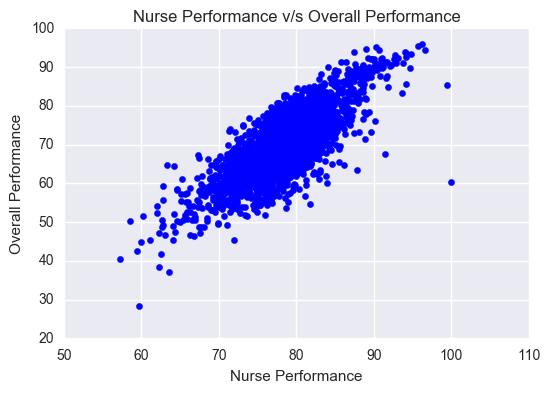

In [243]:
plt.scatter(x=nurseperformance,y=overallperformance, color='blue')
plt.xlabel('Nurse Performance')
plt.ylabel('Overall Performance')
plt.title('Nurse Performance v/s Overall Performance')

In [244]:
print correlation(hospitalresponsivenesss, overallperformance)

0.702637177189


In [245]:
print correlation(painmanagementperformance, overallperformance)

0.739759590254


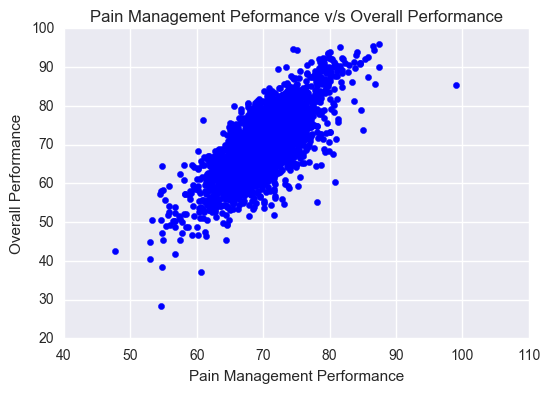

In [246]:
plt.scatter(x=painmanagementperformance,y=overallperformance, color='blue')
plt.xlabel('Pain Management Performance')
plt.ylabel('Overall Performance')
plt.title('Pain Management Peformance v/s Overall Performance')

In [247]:
print correlation(hospitalcleanlinesss, overallperformance)

0.679832223992


In [248]:
print correlation(dischargeperformance, overallperformance)

0.629634290648


In [249]:
features_labels = ['nurseperformance','doctorpeformance', 'painmanagementperformance', 'hospitalcleanlinesss']
target_labels = ['overallperformance']
features = data_formatted[features_labels]
target = data_formatted[target_labels]

In [250]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size = 0.33, random_state = 42)

In [251]:
lr = LinearRegression()
lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [252]:
lr.intercept_

array([-32.95971825])

In [253]:
lr.coef_

array([[ 0.76744182,  0.00908904,  0.36268732,  0.25986227]])

# R Squared

In [254]:
lr.score(features_test, target_test)

0.61067214955037874

In [286]:
data_formatted['doctorsachievementpoints'] = data_formatted['Communication with Doctors Achievement Points'].str[:2]
data_formatted['nursesachievementpoints'] = data_formatted['Communication with Nurses Achievement Points'].str[:2]
data_formatted['hospitalstaffachievementpoints'] = data_formatted['Responsiveness of Hospital Staff Achievement Points'].str[:2]
data_formatted['painmanagementachievementpoints'] = data_formatted['Pain Management Achievement Points'].str[:2]
data_formatted['medicineachievementpoints'] = data_formatted['Communication about Medicines Achievement Points'].str[:2]
data_formatted['cleanlinessachievementpoints'] = data_formatted['Cleanliness and Quietness of Hospital Environment Achievement Points'].str[:2]
data_formatted['dischargeachievementpoints'] = data_formatted['Discharge Information Achievement Points'].str[:2]
data_formatted['overallachievementpoints'] = data_formatted['Overall  Rating of Hospital Achievement Points'].str[:2]



In [287]:
data_formatted.tail(2)

,Provider Number,Hospital Name,Address,City,State,ZIP Code,County Name,Communication with Nurses Floor,Communication with Nurses Achievement Threshold,Communication with Nurses Benchmark,...,dischargeperformance,overallperformance,doctorsachievementpoints,nursesachievementpoints,hospitalstaffachievementpoints,painmanagementachievementpoints,medicineachievementpoints,cleanlinessachievementpoints,dischargeachievementpoints,overallachievementpoints
2953,230100,TAWAS ST JOSEPH HOSPITAL,200 HEMLOCK,Tawas City,MI,48764,IOSCO,58.14,78.19,86.61,...,90.20,72.61,3,7,6,7,67,5,8,2
2954,260061,NEVADA REGIONAL MEDICAL CENTER,800 S ASH ST,Nevada,MO,64772,VERNON,58.14,78.19,86.61,...,83.83,69.17,1,1,4,0,68,5,0,0


In [294]:
data_formatted = data_formatted[data_formatted.doctorsachievementpoints.str.contains("No") ==False]

In [295]:
data_formatted.doctorsachievementpoints = data_formatted.doctorsachievementpoints.astype(float)

In [296]:
data_formatted.nursesachievementpoints = data_formatted.nursesachievementpoints.astype(float)

In [297]:
data_formatted.hospitalstaffachievementpoints = data_formatted.hospitalstaffachievementpoints.astype(float)

In [298]:
data_formatted.painmanagementachievementpoints = data_formatted.painmanagementachievementpoints.astype(float)

In [299]:
data_formatted.medicineachievementpoints = data_formatted.medicineachievementpoints.astype(float)

In [300]:
data_formatted.cleanlinessachievementpoints = data_formatted.cleanlinessachievementpoints.astype(float)

In [301]:
data_formatted.dischargeachievementpoints = data_formatted.dischargeachievementpoints.astype(float)

In [302]:
data_formatted.overallachievementpoints = data_formatted.overallachievementpoints.astype(float)

In [303]:
doctorsachievementpoints = data_formatted['doctorsachievementpoints']
nursesachievementpoints = data_formatted['nursesachievementpoints']
hospitalstaffachievementpoints =data_formatted['hospitalstaffachievementpoints']
painmanagementachievementpoints = data_formatted['painmanagementachievementpoints']
medicineachievementpoints = data_formatted['medicineachievementpoints']
cleanlinessachievementpoints = data_formatted['cleanlinessachievementpoints']
dischargeachievementpoints = data_formatted['dischargeachievementpoints']
overallachievementpoints = data_formatted['overallachievementpoints']

In [304]:
print correlation(doctorsachievementpoints, overallachievementpoints)

0.539205994602


In [305]:
print correlation(nursesachievementpoints, overallachievementpoints)

0.714720685884


In [306]:
print correlation(hospitalstaffachievementpoints, overallachievementpoints)

0.613735550828


In [307]:
print correlation(painmanagementachievementpoints, overallachievementpoints)

0.661279459609


In [308]:
print correlation(medicineachievementpoints, overallachievementpoints)

0.601888014448


In [309]:
print correlation(cleanlinessachievementpoints, overallachievementpoints)

0.634463624569


In [310]:
print correlation(dischargeachievementpoints, overallachievementpoints)

0.525675988606


In [349]:
features_labels = ['nursesachievementpoints','painmanagementachievementpoints', 'medicineachievementpoints', 'cleanlinessachievementpoints', 
                   'dischargeachievementpoints' ]
target_labels = ['overallachievementpoints']
features = data_formatted[features_labels]
target = data_formatted[target_labels]

In [350]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, test_size = 0.33, random_state = 42)

In [351]:
lr = LinearRegression()
lr.fit(features_train, target_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [352]:
lr.intercept_

array([-1.16535299])

In [353]:
lr.coef_

array([[ 0.32005076,  0.16981493,  0.0218821 ,  0.21309457,  0.19538108]])

In [354]:
lr.score(features_test, target_test)

0.59062969037423929